In [5]:
#  Deportista 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ruta de tu archivo
ruta = r"C:\Users\USUARIO\OneDrive\Desktop\Proyecto Biomecánica\Deportista2.xlsm"

# Leer el archivo completo
df = pd.read_excel(ruta, header=None)

# Función para extraer un bloque
def extraer_bloque(df, col_t, col_x, col_y, nombre):
    bloque = df[[col_t, col_x, col_y]].copy()
    bloque.columns = ["Tiempo", "X", "Y"]
    # Eliminar filas que no contienen números
    bloque = bloque[pd.to_numeric(bloque["Tiempo"], errors="coerce").notna()]
    bloque["Tiempo"] = bloque["Tiempo"].astype(float)
    bloque["X"] = bloque["X"].astype(float)
    bloque["Y"] = bloque["Y"].astype(float)
    print(f"\nPreview de {nombre}:")
    display(bloque.head())
    return bloque

# Extraer cada segmento
pie = extraer_bloque(df, 0, 1, 2, "Pie")
muslo = extraer_bloque(df, 4, 5, 6, "Muslo;")
pantorrilla = extraer_bloque(df, 8, 9, 10, "Pantorrilla")
cadera = extraer_bloque(df, 12, 13, 14, "Cadera")
sacro = extraer_bloque(df, 16, 17, 18, "Sacro")
tobillo = extraer_bloque(df, 20, 21, 22, "Tobillo")
rodilla = extraer_bloque(df, 24, 25, 26, "Rodilla")


Preview de Pie:


,Tiempo,X,Y
4,-1668.333374,-46.302246,-4.724937
5,-1634.966675,-46.407757,-4.723991
6,-1601.599976,-46.512932,-4.722412
7,-1568.233276,-46.619591,-4.720924
8,-1534.866699,-46.833614,-4.581696



Preview de Muslo;:


,Tiempo,X,Y
4,-1668.333374,-20.836306,17.043526
5,-1634.966675,-20.942825,17.471573
6,-1601.599976,-21.049591,18.326077
7,-1568.233276,-21.263491,19.394379
8,-1534.866699,-21.584328,20.677105



Preview de Pantorrilla:


,Tiempo,X,Y
4,-1668.333374,-27.187160,-2.551285
5,-1634.966675,-27.400728,-2.125084
6,-1601.599976,-27.613766,-1.697311
7,-1568.233276,-27.827940,-1.055389
8,-1534.866699,-28.362272,0.012794



Preview de Cadera:


,Tiempo,X,Y
4,-1668.333374,-25.597502,27.238689
5,-1634.966675,-25.597311,27.666618
6,-1601.599976,-25.597443,28.521141
7,-1568.233276,-25.704418,29.589485
8,-1534.866699,-25.811838,30.872025



Preview de Sacro:


,Tiempo,X,Y
4,-1668.333374,-28.461334,36.172039
5,-1634.966675,-28.354410,36.599289
6,-1601.599976,-28.247122,37.453766
7,-1568.233276,-28.140244,38.522659
8,-1534.866699,-28.033279,40.019016



Preview de Tobillo:


,Tiempo,X,Y
4,-1668.333374,-42.550068,5.737144
5,-1634.966675,-42.764469,5.950104
6,-1601.599976,-43.085861,6.163086
7,-1568.233276,-43.620552,6.376450
8,-1534.866699,-44.368683,6.589584



Preview de Rodilla:


,Tiempo,X,Y
4,-1668.333374,-13.826084,-6.799957
5,-1634.966675,-13.933341,-6.372429
6,-1601.599976,-14.146510,-5.517128
7,-1568.233276,-14.359985,-4.234627
8,-1534.866699,-14.679921,-2.951485


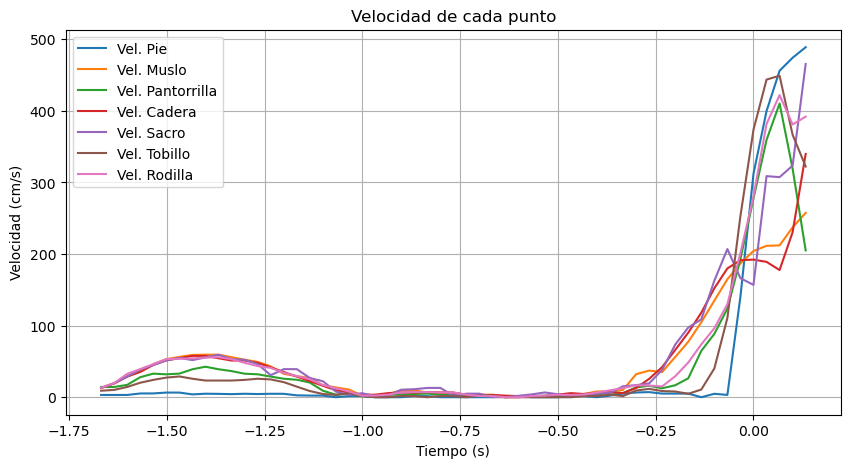

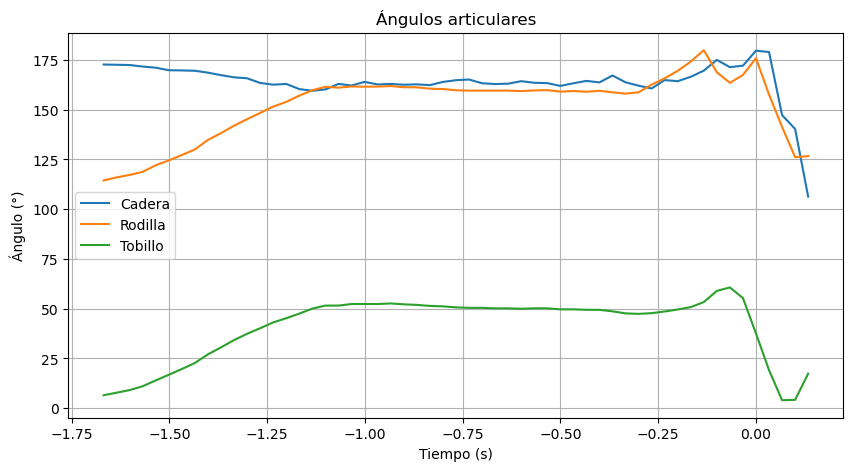


==== Pie ====
Velocidad total MAX: 488.986 cm/s
Velocidad total MIN: 0.015 cm/s
Velocidad en X MAX: 416.456 cm/s
Velocidad en X MIN: -6.488 cm/s
Velocidad en Y MAX: 316.501 cm/s
Velocidad en Y MIN: -1.606 cm/s

==== Muslo ====
Velocidad total MAX: 257.544 cm/s
Velocidad total MIN: 0.024 cm/s
Velocidad en X MAX: 256.268 cm/s
Velocidad en X MIN: -14.416 cm/s
Velocidad en Y MAX: 76.909 cm/s
Velocidad en Y MIN: -26.480 cm/s

==== Pantorrilla ====
Velocidad total MAX: 410.372 cm/s
Velocidad total MIN: 0.031 cm/s
Velocidad en X MAX: 394.792 cm/s
Velocidad en X MIN: -25.622 cm/s
Velocidad en Y MAX: 128.054 cm/s
Velocidad en Y MIN: -6.387 cm/s

==== Cadera ====
Velocidad total MAX: 339.819 cm/s
Velocidad total MIN: 1.598 cm/s
Velocidad en X MAX: 224.365 cm/s
Velocidad en X MIN: -4.806 cm/s
Velocidad en Y MAX: 255.220 cm/s
Velocidad en Y MIN: -10.323 cm/s

==== Sacro ====
Velocidad total MAX: 465.583 cm/s
Velocidad total MIN: 0.042 cm/s
Velocidad en X MAX: 459.711 cm/s
Velocidad en X MIN: -9.7

In [6]:
def calcular_velocidad(segmento):
    x = segmento["X"].values
    y = segmento["Y"].values
    t = segmento["Tiempo"].values / 1000  # ms → s
    
    vx = np.gradient(x, t)
    vy = np.gradient(y, t)
    v = np.sqrt(vx**2 + vy**2)
    return vx, vy, v

vel_pie = calcular_velocidad(pie)
vel_muslo = calcular_velocidad(muslo)
vel_pant = calcular_velocidad(pantorrilla)
vel_cad = calcular_velocidad(cadera)
vel_sacro = calcular_velocidad(sacro)
vel_tobi = calcular_velocidad(tobillo)
vel_rodi = calcular_velocidad(rodilla)


def angulo_3p(a, b, c):
    ba = a - b
    bc = c - b
    
    cos_ang = np.sum(ba * bc, axis=1) / (np.linalg.norm(ba, axis=1) * np.linalg.norm(bc, axis=1))
    ang = np.arccos(np.clip(cos_ang, -1, 1))
    return np.degrees(ang)

pie_xy = pie[["X","Y"]].values
pant_xy = pantorrilla[["X","Y"]].values
muslo_xy = muslo[["X","Y"]].values
cadera_xy = cadera[["X","Y"]].values
sacro_xy = sacro[["X","Y"]].values

# Rodilla = Muslo - Rodilla(Pant) - Pie
angulo_rodilla = angulo_3p(muslo_xy, pant_xy, pie_xy)

# Cadera = Sacro - Cadera - Muslo
angulo_cadera = angulo_3p(sacro_xy, cadera_xy, muslo_xy)

# Tobillo = Pantorrilla - Pie - eje horizontal (vector auxiliar)
angulo_tobillo = angulo_3p(pant_xy, pie_xy, pie_xy + np.array([1,0]))

# =========================================
# Gráficas
# =========================================
tiempo_seg = pie["Tiempo"].values / 1000

plt.figure(figsize=(10,5))
plt.plot(tiempo_seg, vel_pie[2], label="Vel. Pie")
plt.plot(tiempo_seg, vel_muslo[2], label="Vel. Muslo")
plt.plot(tiempo_seg, vel_pant[2], label="Vel. Pantorrilla")
plt.plot(tiempo_seg, vel_cad[2], label="Vel. Cadera")
plt.plot(tiempo_seg, vel_sacro[2], label="Vel. Sacro")
plt.plot(tiempo_seg, vel_tobi[2], label="Vel. Tobillo")
plt.plot(tiempo_seg, vel_rodi[2], label="Vel. Rodilla")
plt.legend()
plt.title("Velocidad de cada punto")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (cm/s)")
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(tiempo_seg, angulo_cadera, label="Cadera")
plt.plot(tiempo_seg, angulo_rodilla, label="Rodilla")
plt.plot(tiempo_seg, angulo_tobillo, label="Tobillo")
plt.legend()
plt.title("Ángulos articulares")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°)")
plt.grid()
plt.show()

# =========================================
# Velocidades máximas y mínimas
# =========================================
def resumen_vel(nombre, vel):
    vx, vy, v = vel
    print(f"\n==== {nombre} ====")
    print(f"Velocidad total MAX: {np.max(v):.3f} cm/s")
    print(f"Velocidad total MIN: {np.min(v):.3f} cm/s")
    print(f"Velocidad en X MAX: {np.max(vx):.3f} cm/s")
    print(f"Velocidad en X MIN: {np.min(vx):.3f} cm/s")
    print(f"Velocidad en Y MAX: {np.max(vy):.3f} cm/s")
    print(f"Velocidad en Y MIN: {np.min(vy):.3f} cm/s")

resumen_vel("Pie", vel_pie)
resumen_vel("Muslo", vel_muslo)
resumen_vel("Pantorrilla", vel_pant)
resumen_vel("Cadera", vel_cad)
resumen_vel("Sacro", vel_sacro)
resumen_vel("Tobillo", vel_tobi)
resumen_vel("Rodilla", vel_rodi)

# =========================================
# Ángulos máximos y mínimos
# =========================================
def resumen_ang(nombre, ang):
    print(f"\n==== Ángulo de {nombre} ====")
    print(f"Ángulo MAX: {np.max(ang):.3f} grados")
    print(f"Ángulo MIN: {np.min(ang):.3f} grados")

resumen_ang("Cadera", angulo_cadera)
resumen_ang("Rodilla", angulo_rodilla)
resumen_ang("Tobillo", angulo_tobillo)

